In [42]:
from tensorflow.keras.datasets import mnist
# from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
print(x_train.shape) # images
print(y_train.shape) # labels

print(x_test.shape) # images
print(y_test.shape) # labels

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


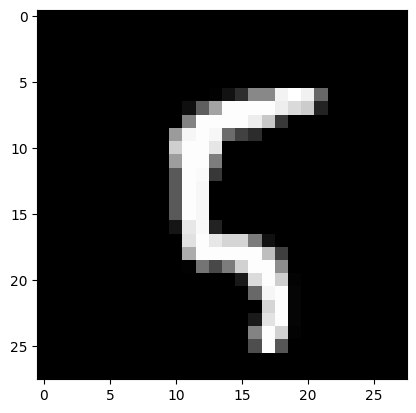

In [25]:
plt.imshow(x_train[100], cmap='gray')
plt.show()

In [26]:
y_train[100]

5

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
x_train = x_train.reshape(60000, 28*28) # Flattening the image
y_train_ohe = to_categorical(y_train)

x_test = x_test.reshape(10000, 28*28)
y_test_ohe = to_categorical(y_test)

In [46]:
print(x_train.shape) # images
print(y_train_ohe.shape) # labels

print(x_test.shape) # images
print(y_test_ohe.shape) # labels

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### Model Building

- Model Definition - Architecture (#Layers, #Nodes, Activation Functions etc)
- Model Compilation - Accuracy Metric, Loss Function, Optimization
- Model Fit - Dataset, #Epochs 

**Model Defintion** 

In [90]:
model = Sequential() # Empty model
model.add(Input(shape=(784,))) # Input
model.add(Dense(256, activation='relu')) #Hidden
model.add(Dense(10, activation="softmax")) #Output

**Model Compilation** 

In [91]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = 'accuracy')

**Model Training/Fit** 

In [92]:
model.fit(x=x_train,
          y=y_train_ohe,
          epochs=30,
          batch_size=1000,
          validation_data=(x_test,y_test_ohe))

Epoch 1/30
60/60 [==============================] - 1s 18ms/step - loss: 17.7247 - accuracy: 0.7878 - val_loss: 2.9955 - val_accuracy: 0.9152
Epoch 2/30
60/60 [==============================] - 1s 17ms/step - loss: 2.5459 - accuracy: 0.9146 - val_loss: 1.7081 - val_accuracy: 0.9311
Epoch 3/30
60/60 [==============================] - 1s 19ms/step - loss: 1.2397 - accuracy: 0.9400 - val_loss: 0.9275 - val_accuracy: 0.9524
Epoch 4/30
60/60 [==============================] - 1s 16ms/step - loss: 0.6640 - accuracy: 0.9577 - val_loss: 0.8771 - val_accuracy: 0.9544
Epoch 5/30
60/60 [==============================] - 1s 12ms/step - loss: 0.4305 - accuracy: 0.9671 - val_loss: 1.0935 - val_accuracy: 0.9449
Epoch 6/30
60/60 [==============================] - 1s 10ms/step - loss: 0.3115 - accuracy: 0.9744 - val_loss: 0.8902 - val_accuracy: 0.9499
Epoch 7/30
60/60 [==============================] - 1s 12ms/step - loss: 0.2303 - accuracy: 0.9793 - val_loss: 0.7270 - val_accuracy: 0.9630
Epoch 8/30
6

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#### Exploring Results

In [94]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

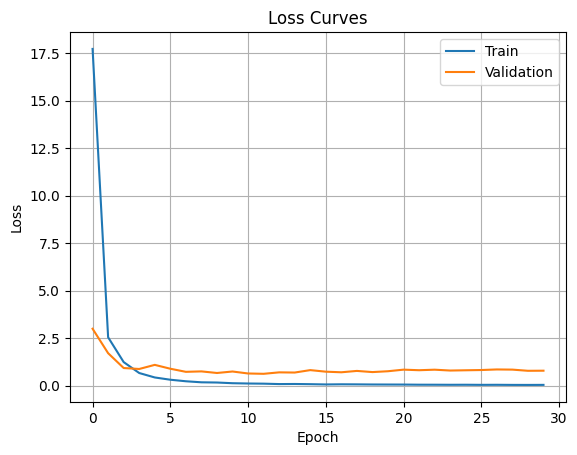

In [95]:
plt.plot(train_loss, label='Train')
plt.plot(val_loss,label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.grid()
plt.show()

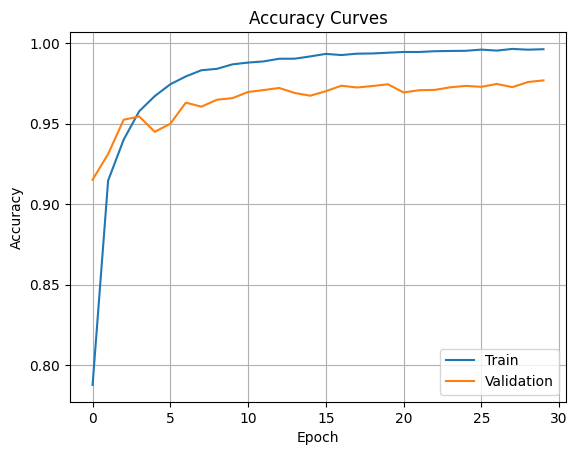

In [98]:
plt.plot(train_accuracy, label='Train')
plt.plot(validation_accuracy,label='Validation')
# plt.ylim(0,1.1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curves")
plt.legend()
plt.grid()
plt.show()

#### Viewing Predictions

In [104]:
x_test[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [114]:
np.argmax(model.predict(x_test[:101]),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6], dtype=int64)

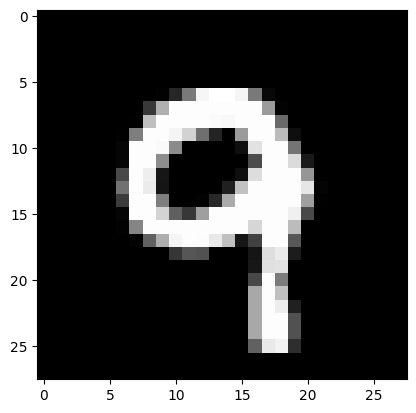

In [115]:
plt.imshow(x_test[99].reshape(28,28),cmap='gray')
plt.show()